In [11]:
import numpy as np
data=np.load('embedd.npy')

In [12]:
data2=np.load('embedding_dat.npy')

In [13]:
data.shape

(10000, 513)

In [14]:
embedding=data2

In [15]:
real_label=data[:,-1]

In [16]:
all_labels=list(real_label)

In [17]:
real_label

array([3., 8., 8., ..., 5., 1., 7.])

In [ ]:
[i for i in range(10000)]

clusters : gồm 10000 phần tử 
* xét cluster có index=8 tương ứng vị trí trong lần phân cụm hiện tại là đầu tiền 

10000 điểm - sau lần phân cụm thì cụm với index 0 (lần chạy 1) tương ứng với tập điểm I_0
trong lần chạy thứ 2 thì index có thể thay đỏi, vẫn là tập điểm I_0 nhưng được gán với cụm có index = 1 
index not important, qtr là trong cụm chứa những ảnh nào 

mỗi cụm chứa những ông nào ? ông nào <=> index của ô ý trong [0,1,...,9999]
xét mỗi cụm thì xét là mỗi cụm chứa những ô nào hay rõ hơn là chứa những index nào  thuộc [0,1,...,9999]

# Clustering by Kmeans

In [18]:
import pandas as  pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [406]:
def Jaccard_score(clusters,all_labels):
    nber_real_class = len(set(all_labels))
    nber_clusters = len(set(clusters))
    dct_class={}#dictionary consist of list order of index of each label in range(10000) 
    for i in list(set(all_labels)):
        temp=[j for j,label in enumerate(all_labels) if label == i]
        dct_class[i] = temp
    dct_cluster={}# dictionary of list index of each cluster
    for i in list(set(clusters)):
        temp=[j for j,label in enumerate(clusters) if label == i]
        dct_cluster[i] = temp
    matrix_Jaccard=np.zeros((nber_real_class,nber_clusters))
    for i in range(len(list(set(all_labels)))):
        for j in range(len(list(set(clusters)))):
            matrix_Jaccard[i,j] = Jaccard_index_formular(dct_class[list(set(all_labels))[i]],
            dct_cluster[list(set(clusters))[j]])
    cluster_closest_labels = [list(set(clusters))[j] for j in list(np.argmax(matrix_Jaccard,axis = 1))]
    label_closest_cluster =  [list(set(all_labels))[j] for j in list(np.argmax(matrix_Jaccard,axis = 0))]
    '''
    print("thu tu label:",list(set(all_labels)))
    print("cac label gan voi cluster theo thu tu:",cluster_closest_labels)
    print("JC index tuong ung:\n",list(np.max(matrix_Jaccard,axis = 1)))
    print("-----000------")
    print("thu tu cluster:",list(set(clusters)))
    print("cac cluster gan voi cac label theo thu tu:",label_closest_cluster)
    print("JC index tuong ung:\n",list(np.max(matrix_Jaccard,axis = 0)))
    print("*********")
    print("matrix Jaccard:\n",np.array(matrix_Jaccard))
    '''
    return matrix_Jaccard
def Jaccard_index_formular(set1,set2):
    a=set(set1)
    b=set(set2)
    T= len(a & b)
    M= len(a | b)
    return T/M


In [42]:
set([1,2,3]) | set([5,2,3])

{1, 2, 3, 5}

In [133]:
def nber_points_inlabel(set1,set2):
    a=set(set1)
    b=set(set2)
    T= len(a & b)
    return T
def nber_point(clusters,all_labels):
    nber_real_class = len(set(all_labels))
    nber_clusters = len(set(clusters))
    dct_class={}#dictionary consist of list order of index of each label in range(10000) 
    for i in list(set(all_labels)):
        temp=[j for j,label in enumerate(all_labels) if label == i]
        dct_class[i] = temp
    dct_cluster={}# dictionary of list index of each cluster
    for i in list(set(clusters)):
        temp=[j for j,label in enumerate(clusters) if label == i]
        dct_cluster[i] = temp
    matrix_nberlabel=np.zeros((nber_real_class,nber_clusters))
    for i in range(len(list(set(all_labels)))):
        for j in range(len(list(set(clusters)))):
            matrix_nberlabel[i,j] = nber_points_inlabel(dct_class[list(set(all_labels))[i]],
            dct_cluster[list(set(clusters))[j]])
    return matrix_nberlabel

In [345]:
def get_index_point_of_cluster(clusters,all_labels):
    nber_real_class = len(set(all_labels))
    nber_clusters = len(set(clusters))
    dct_class={}#dictionary consist of list order of index of each label in range(10000) 
    for i in list(set(all_labels)):
        temp=[j for j,label in enumerate(all_labels) if label == i]
        dct_class[i] = temp
    dct_cluster={}# dictionary of list index of each cluster
    for i in list(set(clusters)):
        temp=[j for j,label in enumerate(clusters) if label == i]
        dct_cluster[i] = temp
    matrix_Jaccard=np.zeros((nber_real_class,nber_clusters))
    for i in range(len(list(set(all_labels)))):
        for j in range(len(list(set(clusters)))):
            matrix_Jaccard[i,j] = Jaccard_index_formular(dct_class[list(set(all_labels))[i]],
            dct_cluster[list(set(clusters))[j]])
    return dct_cluster

In [328]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(embedding)
clusters=list(kmeans.labels_)
matrix_JC=Jaccard_score(clusters,all_labels)

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [8, 9, 3, 5, 0, 1, 2, 4, 7, 6]
JC index tuong ung:
 [0.4746031746031746, 0.7012252591894439, 0.41944641589779985, 0.2724679029957204, 0.4774292272379495, 0.4168994413407821, 0.29474872953133824, 0.642792384406165, 0.5753791257805531, 0.6758241758241759]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cac cluster gan voi cac label theo thu tu: [4.0, 5.0, 6.0, 2.0, 7.0, 3.0, 9.0, 8.0, 0.0, 1.0]
JC index tuong ung:
 [0.4774292272379495, 0.4168994413407821, 0.29474872953133824, 0.41944641589779985, 0.642792384406165, 0.2724679029957204, 0.6758241758241759, 0.5753791257805531, 0.4746031746031746, 0.7012252591894439]
*********
matrix Jaccard:
 [[9.40930476e-03 3.95843642e-03 3.33483551e-02 4.27528676e-02
  4.43458980e-03 6.23263200e-02 7.15465052e-03 2.25825130e-02
  4.74603175e-01 1.66481687e-03]
 [5.18134715e-04 0.00000000e+00 8.62150640e-02 5.00250125e-04
  0.00000000e+00 

# Use file embedd.npy of Tuan

In [41]:
embedding2=data[:,:-1]

In [42]:
kmeans = KMeans(n_clusters=10, random_state=0).fit(embedding2)
clusters=list(kmeans.labels_)
matrix_JC_bad=Jaccard_score(clusters,all_labels)

thu tu label: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0]
cac label gan voi cluster theo thu tu: [1, 0, 6, 8, 6, 8, 9, 7, 5, 2]
JC index tuong ung:
 [0.2656042496679947, 0.39381720430107525, 0.11603471904979443, 0.1530269058295964, 0.24515800203873597, 0.2064516129032258, 0.27445168938944875, 0.2790519877675841, 0.2874493927125506, 0.21710253217102532]
-----000------
thu tu cluster: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cac cluster gan voi cac label theo thu tu: [1.0, 0.0, 9.0, 3.0, 5.0, 8.0, 4.0, 7.0, 5.0, 6.0]
JC index tuong ung:
 [0.39381720430107525, 0.2656042496679947, 0.21710253217102532, 0.12679083094555874, 0.19441860465116279, 0.2874493927125506, 0.24515800203873597, 0.2790519877675841, 0.2064516129032258, 0.27445168938944875]
*********
matrix Jaccard:
 [[0.01170732 0.26560425 0.07007299 0.00191083 0.         0.16840171
  0.01961603 0.00119689 0.00833333 0.01895735]
 [0.3938172  0.00421496 0.11610202 0.00191083 0.         0.01381509
  0.01033912 0.00059809 0.01580247 0.0065543

# Tạo file cho Tuấn đây: 
* cần list khoảng cách từ mỗi điểm đến tâm của cụm nó thuộc về

In [344]:
embedding[10].shape

(512,)

In [339]:
np.array(clusters)

array([5, 7, 7, ..., 1, 9, 4])

In [336]:
centroids = kmeans.cluster_centers_

In [352]:
centroids

array([[0.43243149, 0.50057421, 0.52141308, ..., 0.49362671, 0.44899925,
        0.44592285],
       [0.43960872, 0.50467064, 0.51227922, ..., 0.53412675, 0.43928747,
        0.4656255 ],
       [0.45585168, 0.50841553, 0.48989404, ..., 0.49752121, 0.44219802,
        0.4248924 ],
       ...,
       [0.44203414, 0.5096002 , 0.48754117, ..., 0.4848626 , 0.44046038,
        0.42311174],
       [0.42812833, 0.51309069, 0.48901478, ..., 0.4898334 , 0.43915855,
        0.44111553],
       [0.46165139, 0.51299803, 0.4912773 , ..., 0.50154472, 0.44622084,
        0.38627344]])

In [346]:
dct_cluster = get_index_point_of_cluster(clusters,all_labels)

In [350]:
len(dct_cluster[0])

931

In [354]:
lst_distance=[]
for i in range(10):
    lst_temp=[np.linalg.norm(centroids[i]-embedding[j]) for j in dct_cluster[i]]
    lst_distance.append(lst_temp)


In [359]:
s=np.array(lst_distance)

c:\users\admin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [378]:
sum(s[0])/931

1.2366171039361646

In [367]:
np.save('distances_to_centroid_DAT.npy', s)
np.save('cluster_index_array_DAT.npy',np.array(clusters))

# Chuẩn bị sẵn Elbow với Silhouette để tí dùng của Dũng + của mình

In [381]:
kmeans.inertia_/10000

1.5351118268491177

In [383]:
1.5**0.5

1.224744871391589

## Load file Pickle

In [385]:
import pickle

with open('results.pkl', 'rb') as f:
    data = pickle.load(f)

In [388]:
data[10]

({'gmm': array([4, 8, 8, ..., 0, 3, 9], dtype=int64),
  'kmeans': array([6, 8, 8, ..., 9, 0, 4])},
 {'gmm': 0.018921014, 'kmeans': 0.019144518})

In [389]:
import pickle

with open('results_original.pkl', 'rb') as f:
    data2 = pickle.load(f)
data2

{5: ({'gmm': array([3, 2, 2, ..., 4, 4, 1], dtype=int64),
   'kmeans': array([4, 3, 3, ..., 0, 0, 1])},
  {'gmm': 0.07708762, 'kmeans': 0.07708762}),
 6: ({'gmm': array([0, 1, 1, ..., 4, 5, 0], dtype=int64),
   'kmeans': array([1, 0, 0, ..., 3, 4, 1])},
  {'gmm': 0.07040049, 'kmeans': 0.070594}),
 7: ({'gmm': array([6, 3, 3, ..., 5, 1, 6], dtype=int64),
   'kmeans': array([3, 5, 5, ..., 1, 6, 3])},
  {'gmm': 0.06914428, 'kmeans': 0.0695234}),
 8: ({'gmm': array([3, 1, 5, ..., 0, 7, 3], dtype=int64),
   'kmeans': array([7, 5, 2, ..., 6, 0, 7])},
  {'gmm': 0.06002854, 'kmeans': 0.05988081}),
 9: ({'gmm': array([3, 4, 4, ..., 2, 3, 5], dtype=int64),
   'kmeans': array([8, 1, 6, ..., 2, 8, 7])},
  {'gmm': 0.05943595, 'kmeans': 0.058415577}),
 10: ({'gmm': array([3, 1, 7, ..., 4, 3, 2], dtype=int64),
   'kmeans': array([0, 7, 4, ..., 8, 0, 5])},
  {'gmm': 0.049195662, 'kmeans': 0.0488521}),
 11: ({'gmm': array([7, 8, 6, ..., 5, 7, 1], dtype=int64),
   'kmeans': array([5, 6, 0, ..., 3, 5, 1]

# Plot result of Jaccard more visulization

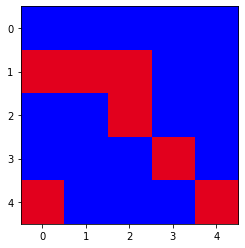

In [3]:
import matplotlib.pyplot as plt

m = [
    [0.5, 0, 2, 0, 0],
    [1, 1, 1, 2, 0],
    [0, 4, 1, 0, 0],
    [0, 4, 4, 1, 2],
    [1, 3, 0, 0, 1]
]

dct = {1: 5., 0: 1., 2: 1., 3: 1., 4: 1., 0.5:1.}
n = [[dct[i] for i in j] for j in m]


plt.imshow(n, cmap='brg', vmin=1, vmax=10)
plt.show()

In [4]:
import seaborn as sns

%matplotlib inline

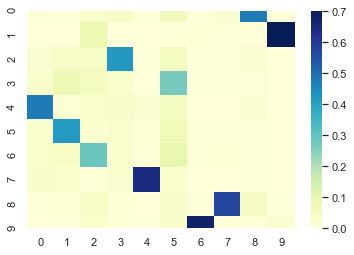

In [23]:
sns.heatmap(matrix_JC, cmap="YlGnBu")

## Tạo dataframe tương ứng cho matrix Jaccard

In [33]:
lst=[[i,j,matrix_JC[i][j]] for i in range(10) for j in range(10)]

In [37]:
import pandas as pd 
df = pd.DataFrame(lst, columns =['Label', 'Cluster','Jaccard_score'])
df

,Label,Cluster,Jaccard_score
0,0,0,0.009409
1,0,1,0.003958
2,0,2,0.033348
3,0,3,0.042753
4,0,4,0.004435
...,...,...,...
95,9,5,0.034403
96,9,6,0.675824
97,9,7,0.005695
98,9,8,0.016411


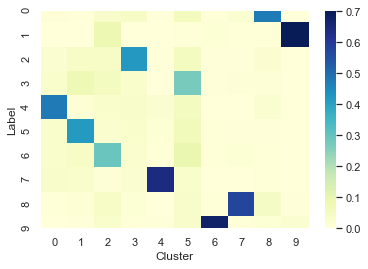

In [39]:
df2 = df.pivot('Label', 'Cluster','Jaccard_score')
ax = sns.heatmap(df2, cmap="YlGnBu")
ax.figure.savefig('JC-heatmap.png')

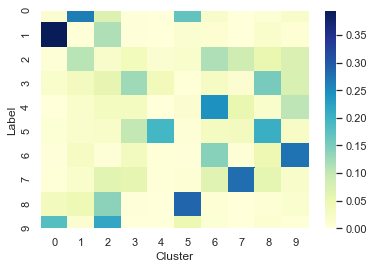

In [44]:
lst2=[[i,j,matrix_JC_bad[i][j]] for i in range(10) for j in range(10)]
import pandas as pd 
df3 = pd.DataFrame(lst2, columns =['Label', 'Cluster','Jaccard_score'])
df2 = df3.pivot('Label', 'Cluster','Jaccard_score')
ax = sns.heatmap(df2, cmap="YlGnBu")
ax.figure.savefig('JC-heatmap-bad.png')

## Vẽ biểu đồ JC cho từng th cluster (cái này để visulization thêm thôi, thật ra cái heatmap ở trên là Ok r)

In [47]:
JC_clus=[matrix_JC[:,i] for  i in range(10)]

In [50]:
list(JC_clus[0])

[0.009409304756926294,
 0.0005181347150259067,
 0.02440318302387268,
 0.02876931273308471,
 0.4774292272379495,
 0.030966364121729845,
 0.028221512247071354,
 0.03483386923901393,
 0.006253256904637832,
 0.0]

#### JC_clus[i] is array of JC score with each label of cluster i

In [54]:
import matplotlib.pyplot as plt
plt.clf()
plt.style.use('seaborn')

<Figure size 576x396 with 0 Axes>

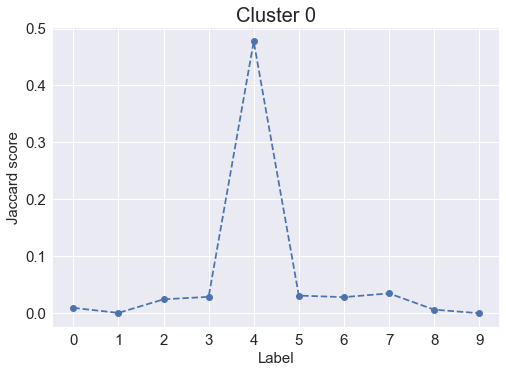

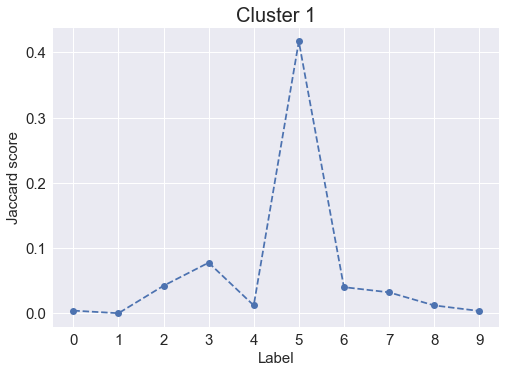

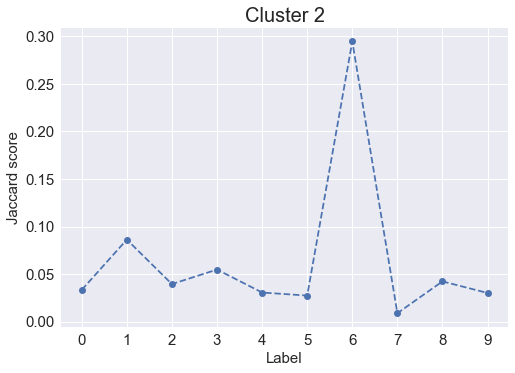

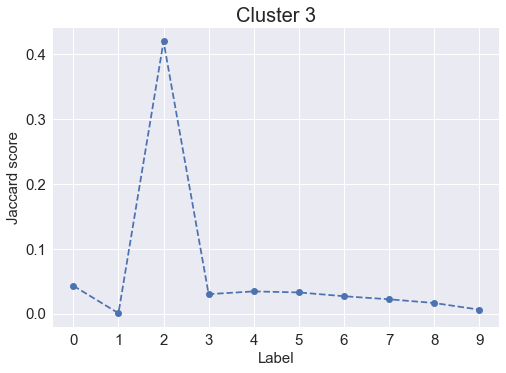

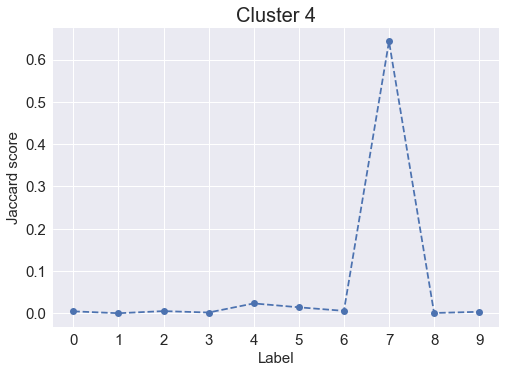

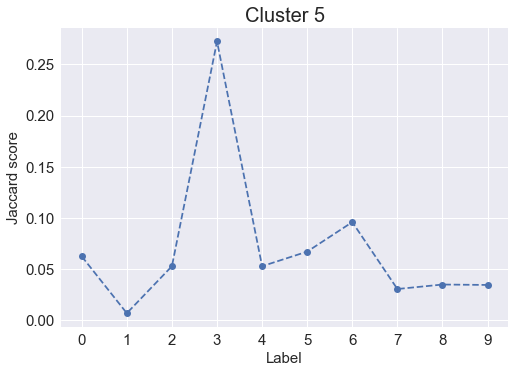

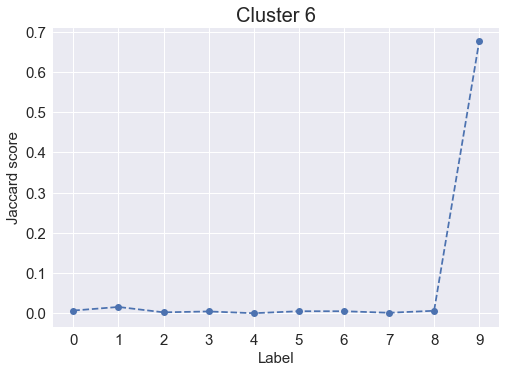

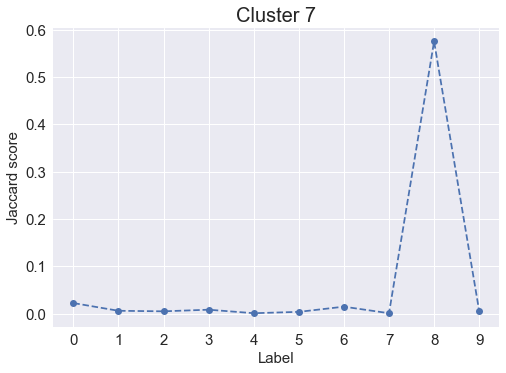

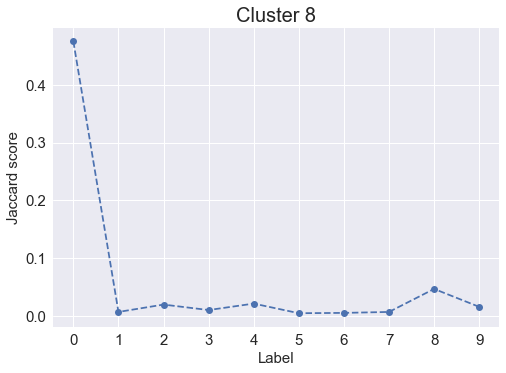

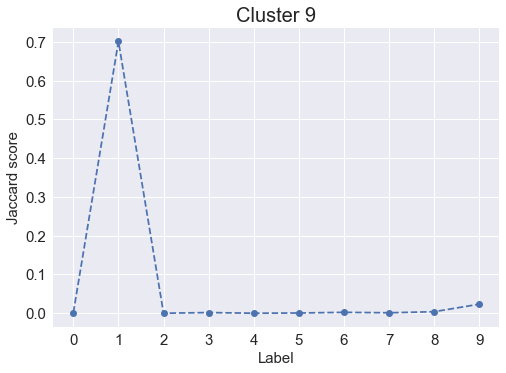

In [71]:
#plt.style.use('seaborn-whitegrid')
for j in range(10):
    plt.plot([i for i in range(10)],list(JC_clus[j]),'o--')
    '''
    for i in range(10):
        plt.plot([i for i in range(10)],list(JC_clus[i]),'o--',label='Cluster '+str(i))
    '''
    plt.xlabel('Label',fontsize=15)
    plt.ylabel('Jaccard score',fontsize=15)
    plt.yticks(fontsize=15 )
    plt.xticks([i for i in range(10)],fontsize=15 )
    #plt.text(1.5,3.3,'Not care line',size=20)
    #plt.text(9,7.3,'Care line',size=20)
    #plt.legend(loc=2, prop={'size': 20})
    plt.title('Cluster '+str(j),fontsize=20)
    plt.savefig("cluster_"+str(j)+'.png')
    plt.show()
 

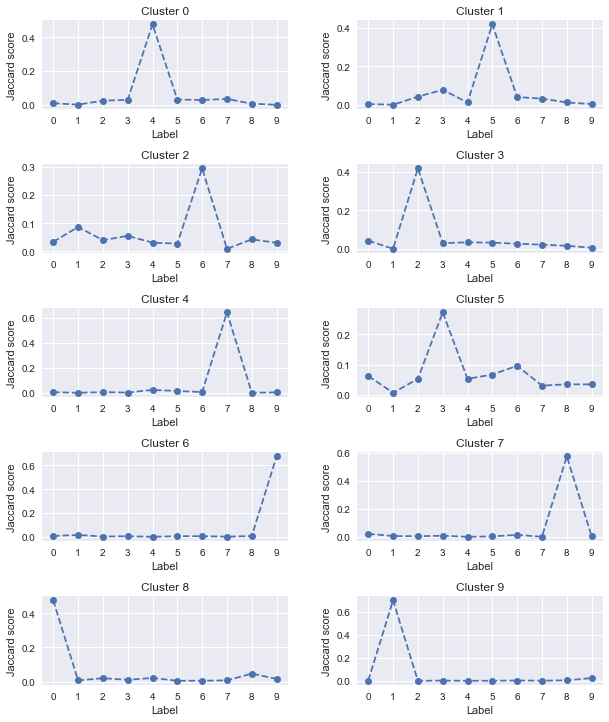

In [105]:

# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(5, 2)
figure.set_size_inches(18.5/2, 10.5)
figure.tight_layout(pad=3.0)
# For Sine Function
axis[0, 0].plot([i for i in range(10)],list(JC_clus[0]),'o--')
axis[0, 0].set_xticks([i for i in range(10)] )
axis[0, 0].set_xlabel('Label')
axis[0, 0].set_ylabel('Jaccard score')
axis[0, 0].set_title("Cluster 0")
  
axis[0, 1].plot([i for i in range(10)],list(JC_clus[1]),'o--')
axis[0, 1].set_xticks([i for i in range(10)] )
axis[0, 1].set_xlabel('Label')
axis[0, 1].set_ylabel('Jaccard score')
axis[0, 1].set_title("Cluster 1")
  
# For Tangent Function
axis[1, 0].plot([i for i in range(10)],list(JC_clus[2]),'o--')
axis[1, 0].set_xticks([i for i in range(10)] )
axis[1, 0].set_xlabel('Label')
axis[1, 0].set_ylabel('Jaccard score')
axis[1, 0].set_title("Cluster 2")
  
axis[1, 1].plot([i for i in range(10)],list(JC_clus[3]),'o--')
axis[1, 1].set_xticks([i for i in range(10)] )
axis[1, 1].set_xlabel('Label')
axis[1, 1].set_ylabel('Jaccard score')
axis[1, 1].set_title("Cluster 3")

axis[2, 0].plot([i for i in range(10)],list(JC_clus[4]),'o--')
axis[2, 0].set_xticks([i for i in range(10)] )
axis[2, 0].set_xlabel('Label')
axis[2, 0].set_ylabel('Jaccard score')
axis[2, 0].set_title("Cluster 4")
  
axis[2, 1].plot([i for i in range(10)],list(JC_clus[5]),'o--')
axis[2, 1].set_xticks([i for i in range(10)] )
axis[2, 1].set_xlabel('Label')
axis[2, 1].set_ylabel('Jaccard score')
axis[2, 1].set_title("Cluster 5")
  
# For Tangent Function
axis[3, 0].plot([i for i in range(10)],list(JC_clus[6]),'o--')
axis[3, 0].set_xticks([i for i in range(10)] )
axis[3, 0].set_xlabel('Label')
axis[3, 0].set_ylabel('Jaccard score')
axis[3, 0].set_title("Cluster 6")
  
axis[3, 1].plot([i for i in range(10)],list(JC_clus[7]),'o--')
axis[3, 1].set_xticks([i for i in range(10)] )
axis[3, 1].set_xlabel('Label')
axis[3, 1].set_ylabel('Jaccard score')
axis[3, 1].set_title("Cluster 7")

axis[4, 0].plot([i for i in range(10)],list(JC_clus[8]),'o--')
axis[4, 0].set_xticks([i for i in range(10)] )
axis[4, 0].set_xlabel('Label')
axis[4, 0].set_ylabel('Jaccard score')
axis[4, 0].set_title("Cluster 8")
  
axis[4, 1].plot([i for i in range(10)],list(JC_clus[9]),'o--')
axis[4, 1].set_xticks([i for i in range(10)] )
axis[4, 1].set_xlabel('Label')
axis[4, 1].set_ylabel('Jaccard score')
axis[4, 1].set_title("Cluster 9")
# Combine all the operations and display
plt.savefig("clusters_JC_score_labels.png")
plt.show()

#### Vẽ biểu đổ mỗi cluster thì ứng với label rồi nhưng chiếm bao nhiêu % trong label thực đó và các label khác

In [110]:
df4 = pd.DataFrame(all_labels, columns =['Label'])
df4.Label.value_counts()

9.0    1000
2.0    1000
4.0    1000
7.0    1000
5.0    1000
1.0    1000
6.0    1000
0.0    1000
8.0    1000
3.0    1000
Name: Label, dtype: int64

#### Bắt đầu load list 10 phần tử, mỗi phần tử tương ứng với số lượng điểm có trong các label của mỗi cluster

In [134]:
matrix_nberlabel = nber_point(clusters,all_labels)
matrix_nberlabel

array([[ 18.,   8.,  74.,  82.,   8., 157.,  13.,  39., 598.,   3.],
       [  1.,   0., 182.,   1.,   0.,  18.,  29.,  11.,  14., 744.],
       [ 46.,  82.,  87., 591.,   9., 134.,   5.,   9.,  37.,   0.],
       [ 54., 146., 119.,  58.,   3., 573.,   9.,  15.,  20.,   3.],
       [624.,  24.,  68.,  66.,  41., 134.,   1.,   2.,  40.,   0.],
       [ 58., 597.,  61.,  63.,  25., 168.,  10.,   7.,  10.,   1.],
       [ 53.,  78., 522.,  52.,  10., 234.,  10.,  26.,  11.,   4.],
       [ 65.,  63.,  20.,  43., 709.,  79.,   3.,   2.,  14.,   2.],
       [ 12.,  24.,  93.,  32.,   1.,  90.,  12., 645.,  84.,   7.],
       [  0.,   7.,  67.,  12.,   6.,  89., 738.,  10.,  30.,  41.]])

### Chú ý mỗi row là tương ứng một label nên tổng luôn = 1k

In [390]:
print(sum(sum(matrix_nberlabel)))
print(sum(matrix_nberlabel))

10000.0
[ 931. 1029. 1293. 1000.  812. 1676.  830.  766.  858.  805.]


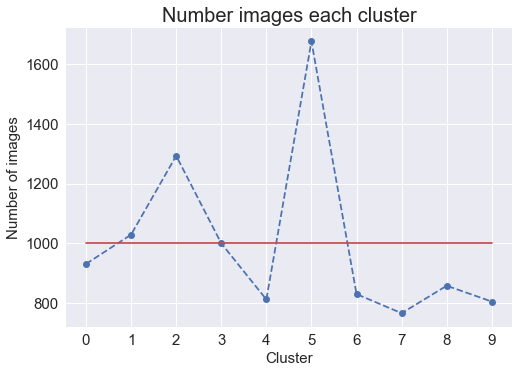

In [403]:

plt.plot([i for i in range(10)],sum(matrix_nberlabel),'o--')
plt.plot([i for i in range(10)],[1000 for _ in range(10)],'r')
plt.xlabel('Cluster',fontsize=15)
plt.ylabel('Number of images',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks([i for i in range(10)],fontsize=15 )
plt.title('Number images each cluster',fontsize=20)
plt.savefig('Number images each cluster_Kmeans_resnet.png')
plt.show()

In [139]:
matrix_nberlabel[:,0]

array([ 18.,   1.,  46.,  54., 624.,  58.,  53.,  65.,  12.,   0.])

In [140]:
nber_clus=[matrix_nberlabel[:,i] for i in range(10)]

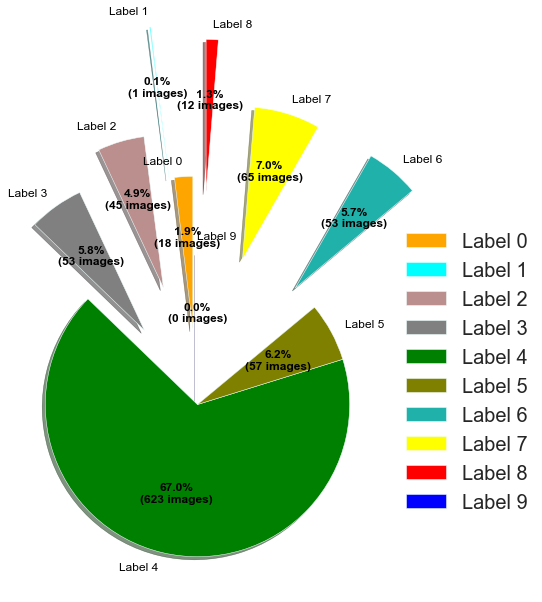

In [231]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[0]
  
  
# Creating explode data
explode = (0.5, 1.5, 0.8, 0.6, 0.0, 0.0,1, 1, 1.4, 0.0)
  
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=20)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter0.png')
# show plot
plt.show()

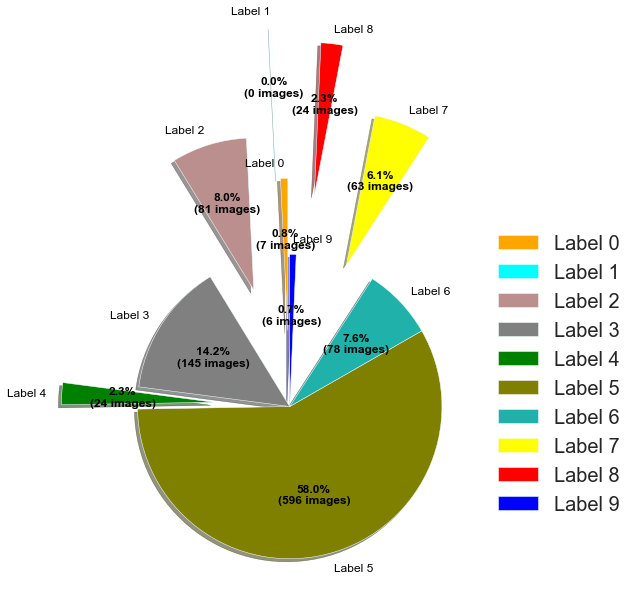

In [232]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[1]
  
  
# Creating explode data
explode = (0.5, 1.5, 0.8, 0, 0.5, 0.0,0, 1, 1.4, 0.0)
  
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=20)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter1.png')
# show plot
plt.show()

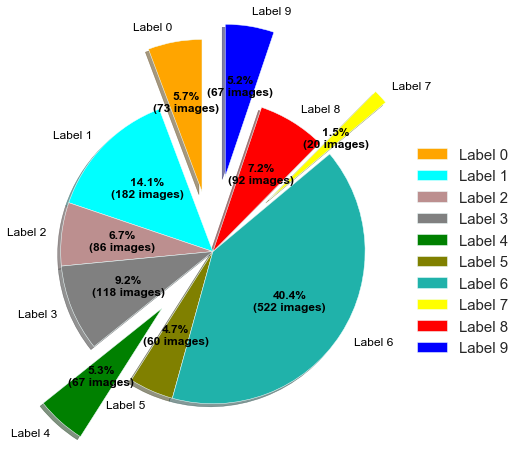

In [240]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[2]
  
  
# Creating explode data
explode = (0.4, 0, 0, 0, 0.5, 0.0,0, 0.5, 0, 0.5)
  
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter2.png')
# show plot
plt.show()

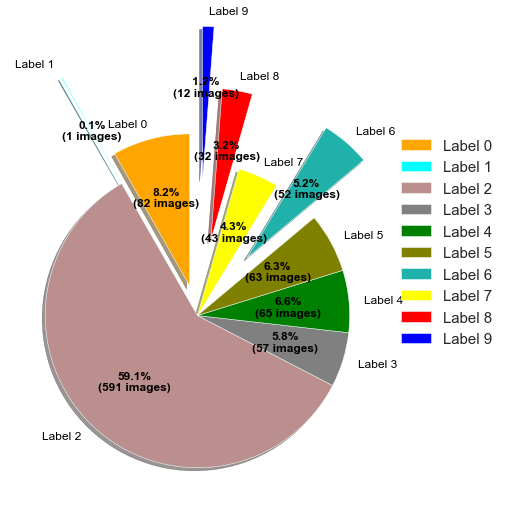

In [252]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[3]
  
  
# Creating explode data
explode = (0.2, 0.8, 0, 0, 0, 0.0,0.5, 0, 0.5, 0.9)
  
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter3.png')
# show plot
plt.show()

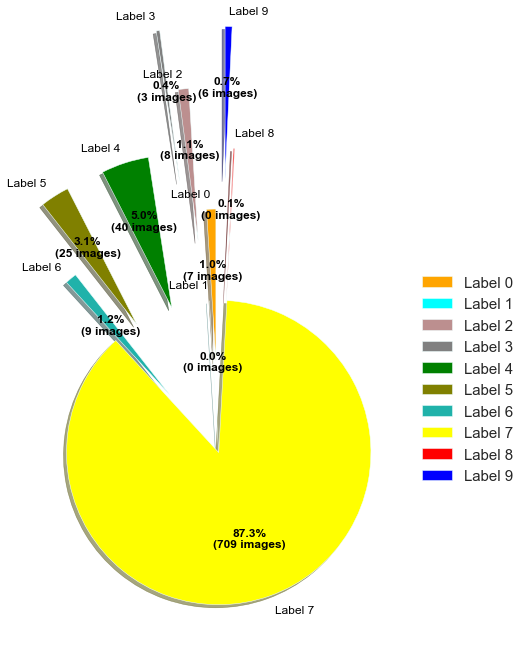

In [273]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[4]
  
  
# Creating explode data
explode = (0.6, 0, 1.4, 1.8, 1, 1,0.5, 0, 1, 1.8)
  
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter4.png')
# show plot
plt.show()

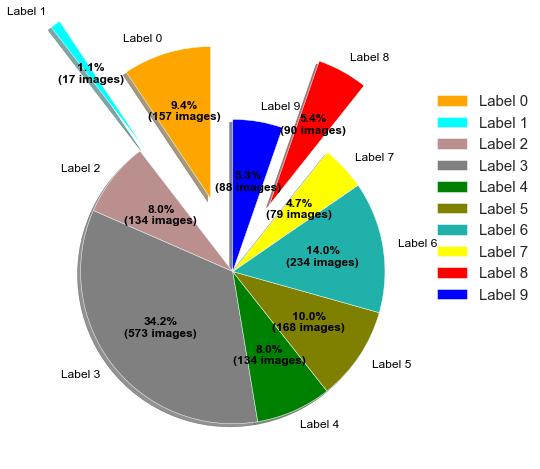

In [272]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[5]
  
  
# Creating explode data
#explode = (0, 0, 0, 0, 0, 0,0, 0, 0, 0)
explode = (0.5, 1, 0, 0, 0, 0,0, 0, 0.5, 0)
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter5.png')
# show plot
plt.show()

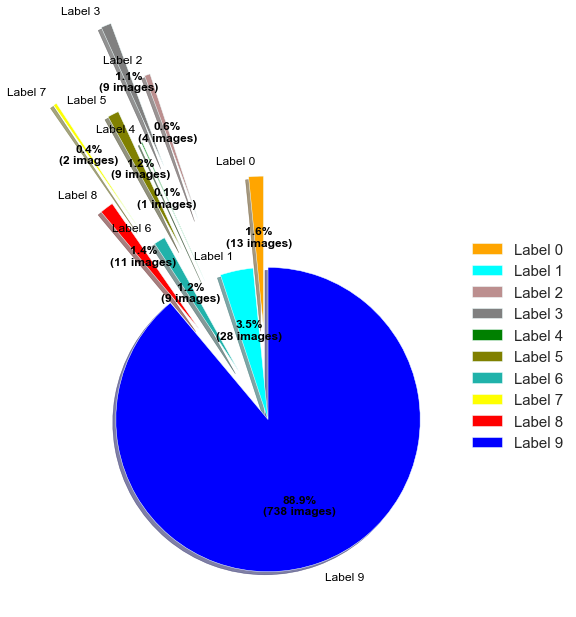

In [283]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[6]
  
  
# Creating explode data
#explode = (0, 0, 0, 0, 0, 0,0, 0, 0, 0)
#explode = (0.5, 1, 0, 0, 0, 0,0, 0, 0.5, 0)
explode = (0.6, 0, 1.4, 1.8, 1, 1.25,0.375, 1.5, 0.75, 0)
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter6.png')
# show plot
plt.show()

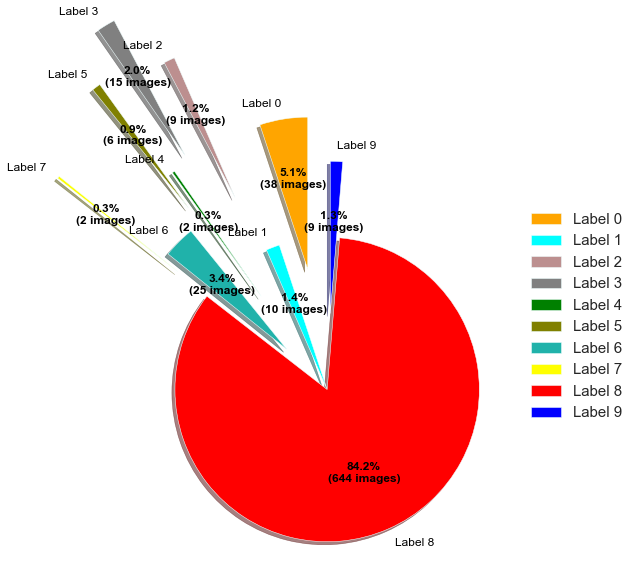

In [293]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[7]
  
  
# Creating explode data
#explode = (0, 0, 0, 0, 0, 0,0, 0, 0, 0)
#explode = (0.5, 1, 0, 0, 0, 0,0, 0, 0.5, 0)
explode = (0.8, 0, 1.4, 1.8, 0.75, 1.5,0.375, 1.25, 0, 0.5)
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,
          
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter7.png')
# show plot
plt.show()

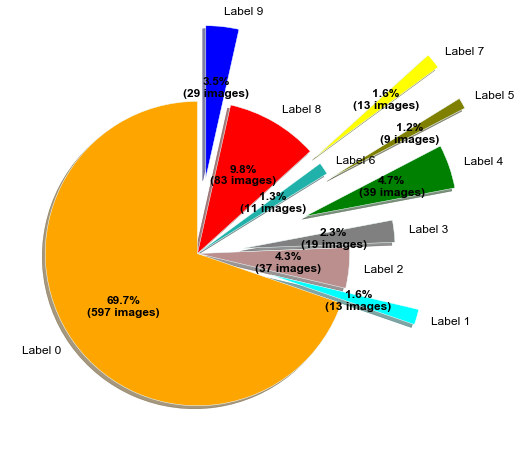

In [308]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label '+str(i) for i in range(10)]
  
data = nber_clus[8]
  
  
# Creating explode data
#explode = (0, 0, 0, 0, 0, 0,0, 0, 0, 0)
#explode = (0.5, 1, 0, 0, 0, 0,0, 0, 0.5, 0)
explode = (0, 0.5, 0, 0.3, 0.75, 1,0, 1, 0, 0.5)
# Creating color parameters
colors = ( "orange", "cyan", "rosybrown",
          "grey", "green", "olive",'lightseagreen','yellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
#ax.legend(wedges, cars,loc ="lower left", bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter8.png')
# show plot
plt.show()

In [317]:
data = np.array([3., 744.,      3.,     7 ,   7.,  41.])

array([  3., 744.,   0.,   3.,   0.,   1.,   4.,   2.,   7.,  41.])

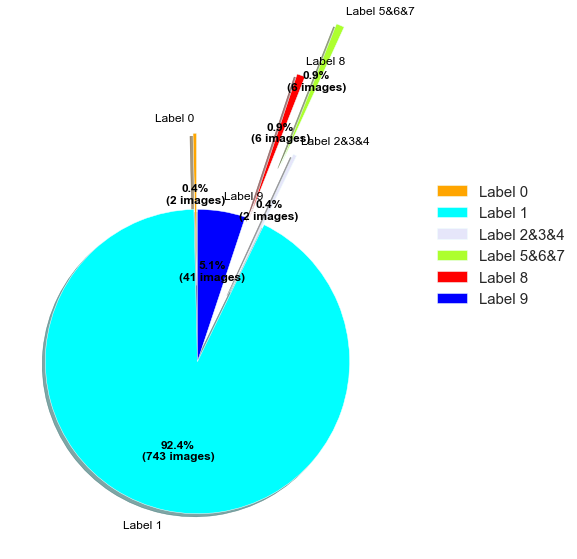

In [326]:

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 9.0
  
# Creating dataset
cars = ['Label 0','Label 1','Label 2&3&4','Label 5&6&7','Label 8','Label 9']
  
#data = nber_clus[-1]
data = np.array([3., 744.,      3.,     7 ,   7.,  41.]) 
  
# Creating explode data
explode = (0.5, 0, 0.5, 1.4, 1, 0)
#explode = (0.6, 0, 1.4, 1.8, 1, 1.25,0.375, 1.5, 0.75, 0)
#explode = (0.5, 1, 0, 0, 0, 0,0, 0, 0.5, 0)
#explode = (0, 0.5, 0, 0.3, 0.75, 1,0, 1, 0, 0.5)
# Creating color parameters
colors = ( "orange", "cyan",  "lavender", 'greenyellow','red','blue')
  
# Wedge properties
wp = { 'linewidth' : 0.5, 'edgecolor' : "azure" }
  
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} images)".format(pct, absolute)
  
# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data, 
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode, 
                                  labels = cars,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black",fontsize=12))
  
# Adding legend
ax.legend(wedges, cars,loc ="upper right", bbox_to_anchor =(1, 0, 0.5, 1),fontsize=15)
  
plt.setp(autotexts, size = 12, weight ="bold")
#ax.set_title("Cluster 0",fontsize=15,loc='right')
plt.savefig('pie_cluter9.png')
# show plot
plt.show()

In [458]:
embedding_resnet18 = np.load('embedding_dat.npy')

In [444]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
embedding_rawdata = x_test.reshape(10000,3072)

In [459]:

def check_clustering_resnet18(nber_clus):
    plt.rcParams['figure.figsize'] = (15.0, 10.0)
    plt.rcParams['font.family'] = "serif"
    kmeans = KMeans(n_clusters=nber_clus, random_state=0).fit(embedding_resnet18)
    clusters=list(kmeans.labels_)
    #matrix_JC=Jaccard_score(clusters,all_labels)
    #lst=[[i,j,matrix_JC[i][j]] for i in range(10) for j in range(nber_clus)]
    #import pandas as pd 
    #df = pd.DataFrame(lst, columns =['Label', 'Cluster','Jaccard_score'])
    #df2 = df.pivot('Label', 'Cluster','Jaccard_score')
    #ax = sns.heatmap(df2, cmap="YlGnBu")
    #Sửa tên hình đã
    
    matrix_nberlabel = nber_point(clusters,all_labels)
    lst=[[i,j,matrix_nberlabel[i][j]] for i in range(10) for j in range(nber_clus)]
    import pandas as pd 
    df = pd.DataFrame(lst, columns =['Label', 'Cluster','Number_images'])
    df2 = df.pivot('Label', 'Cluster','Number_images')
    ax = sns.heatmap(df2, cmap='coolwarm',
                
                fmt=".1f",
                annot_kws={'size':10},
                cbar=True,
                square=True)
    ax.figure.savefig('Nberimages_resnet18_and_'+str(nber_clus)+'clusters.png',dpi=600)

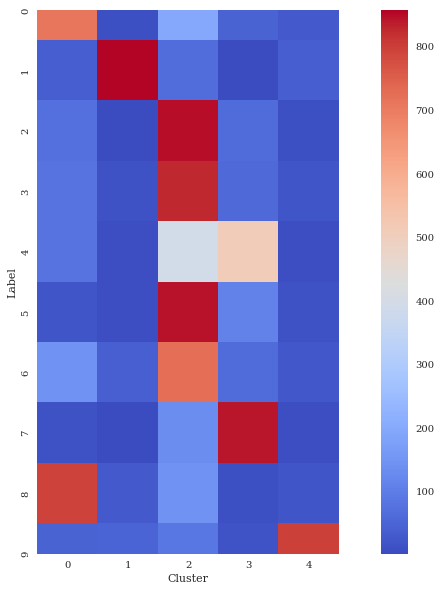

In [460]:
check_clustering_resnet18(5)

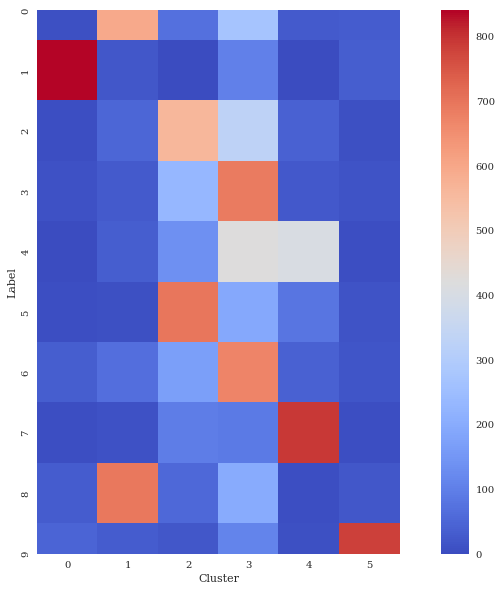

In [461]:
check_clustering_resnet18(6)

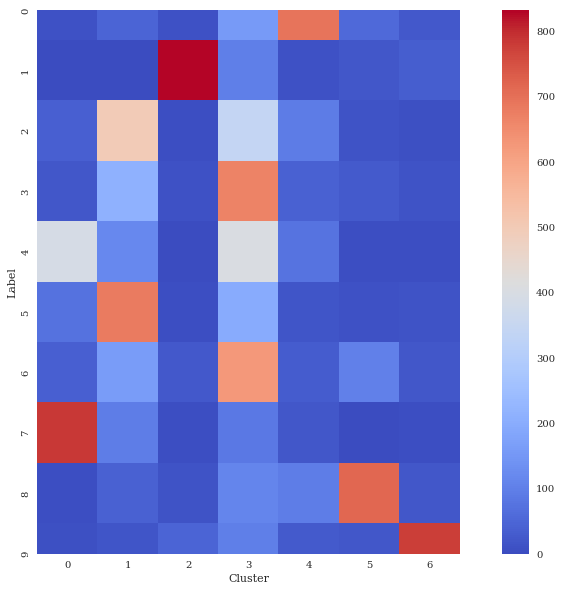

In [462]:
check_clustering_resnet18(7)

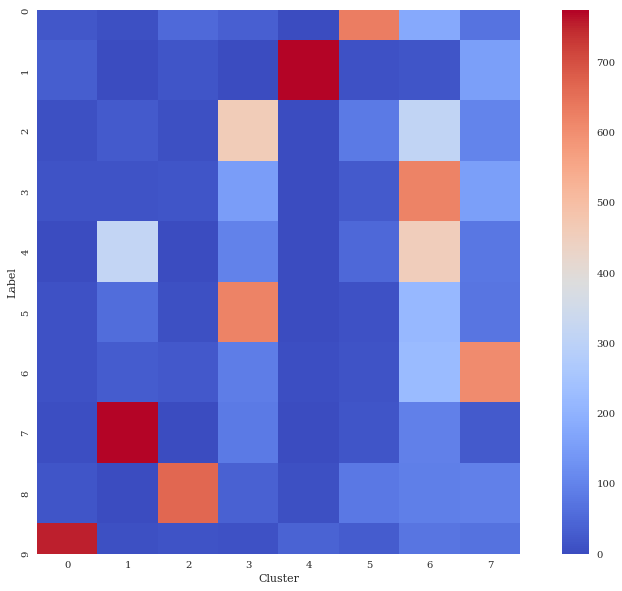

In [463]:
check_clustering_resnet18(8)

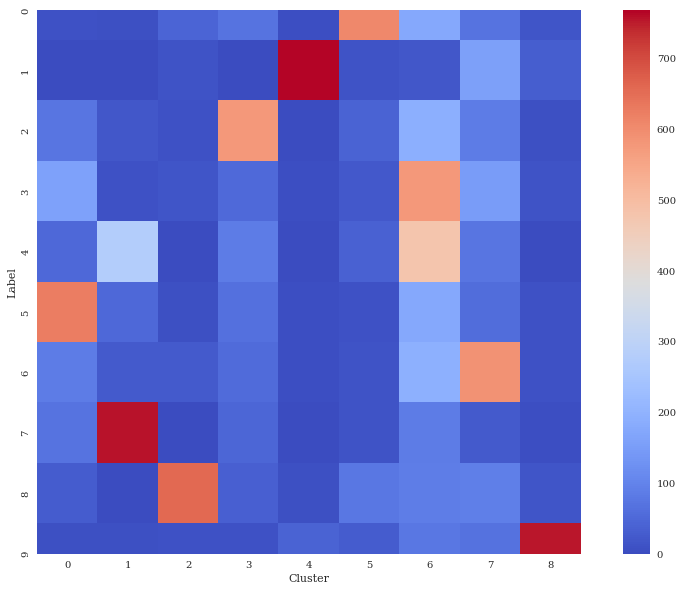

In [464]:
check_clustering_resnet18(9)

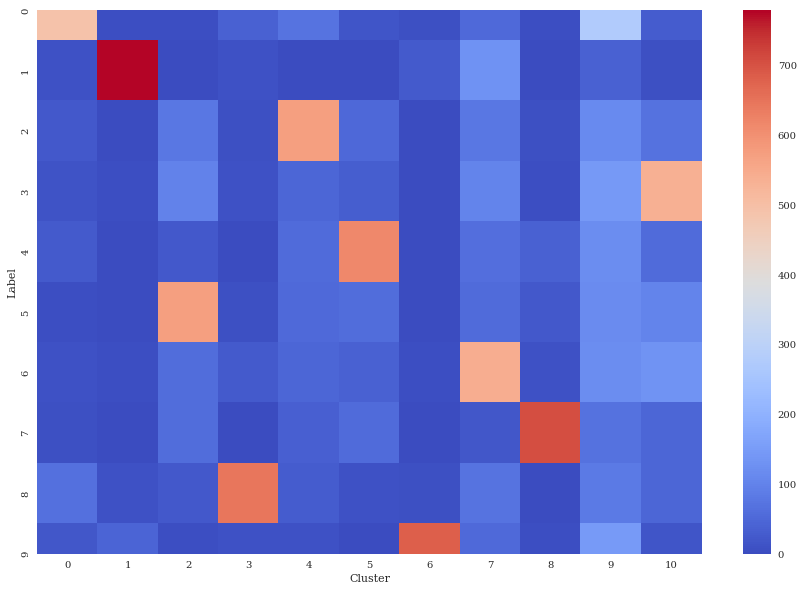

In [466]:
check_clustering_resnet18(11)

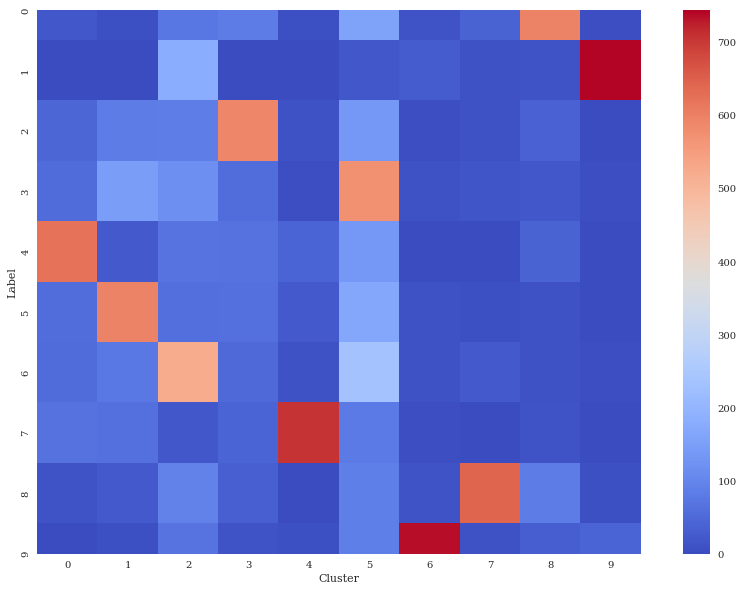

In [465]:
check_clustering_resnet18(10)

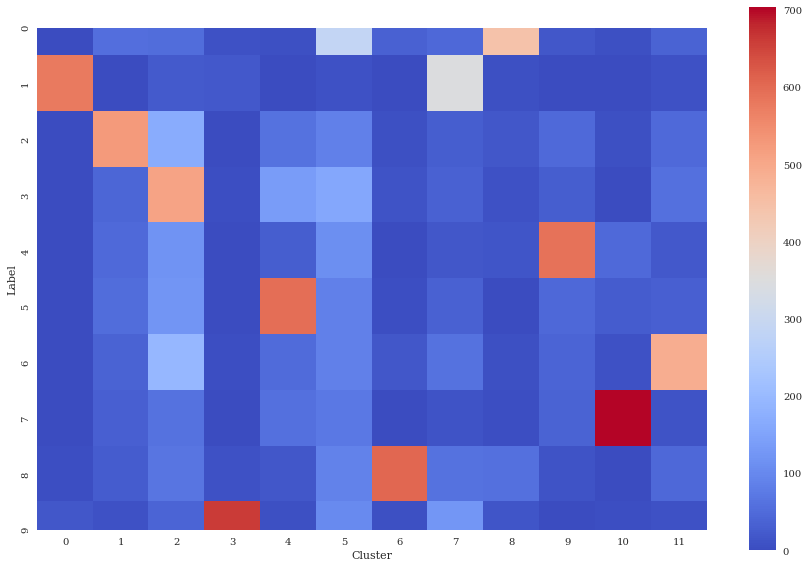

In [467]:
check_clustering_resnet18(12)

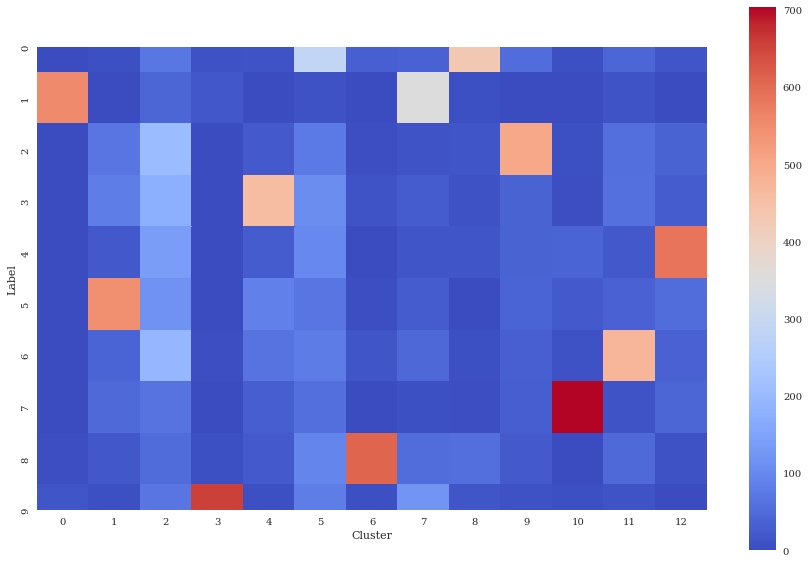

In [468]:
check_clustering_resnet18(13)

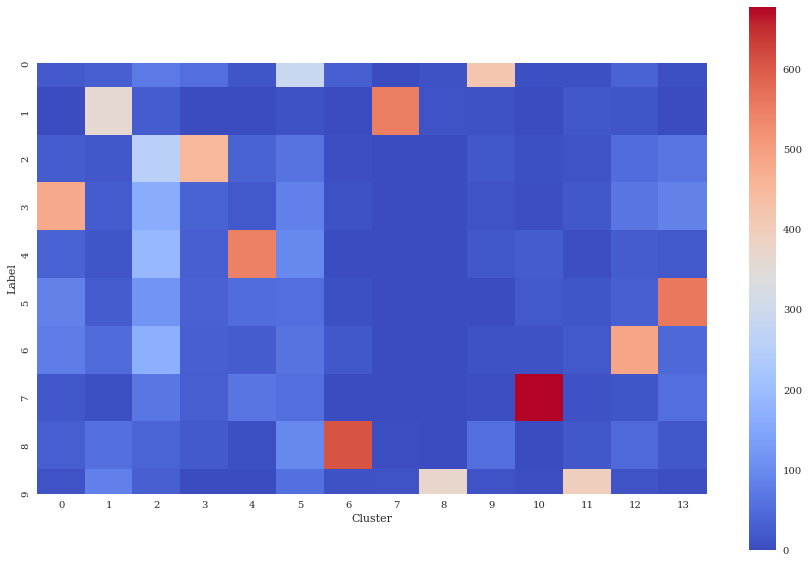

In [469]:
check_clustering_resnet18(14)

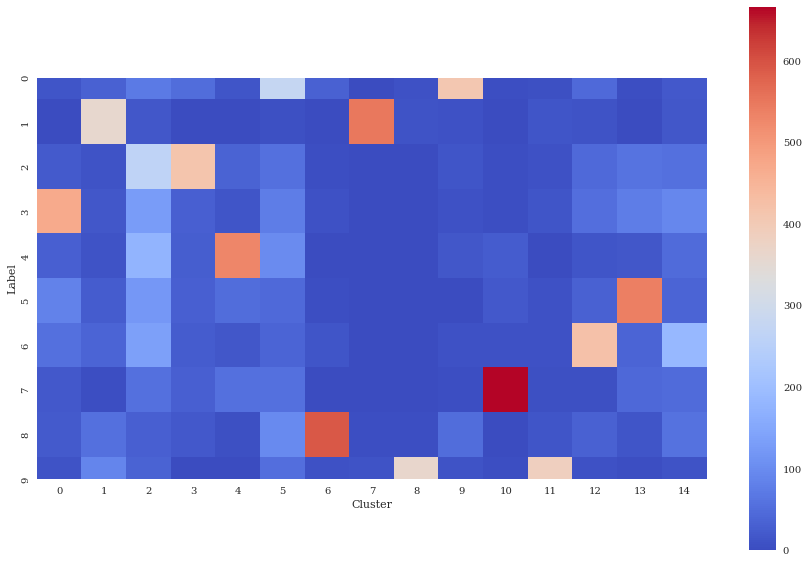

In [470]:
check_clustering_resnet18(15)

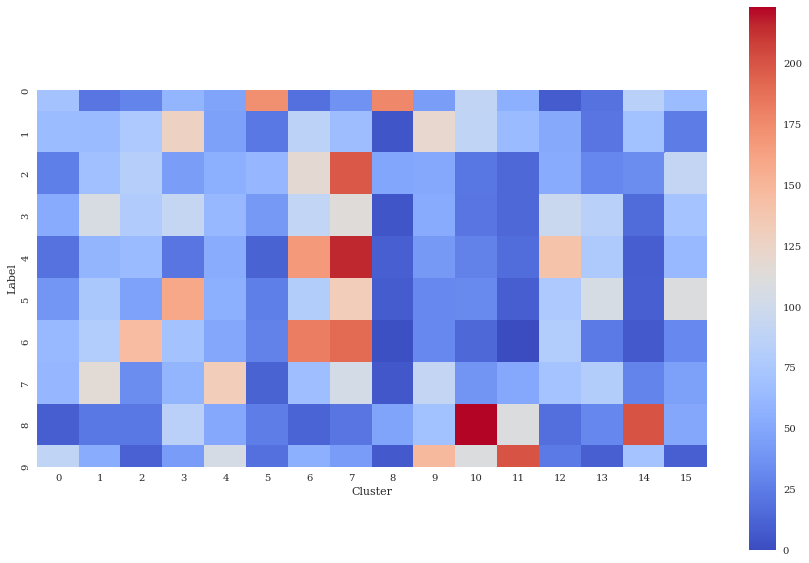

In [450]:
check_clustering_resnet18(16)

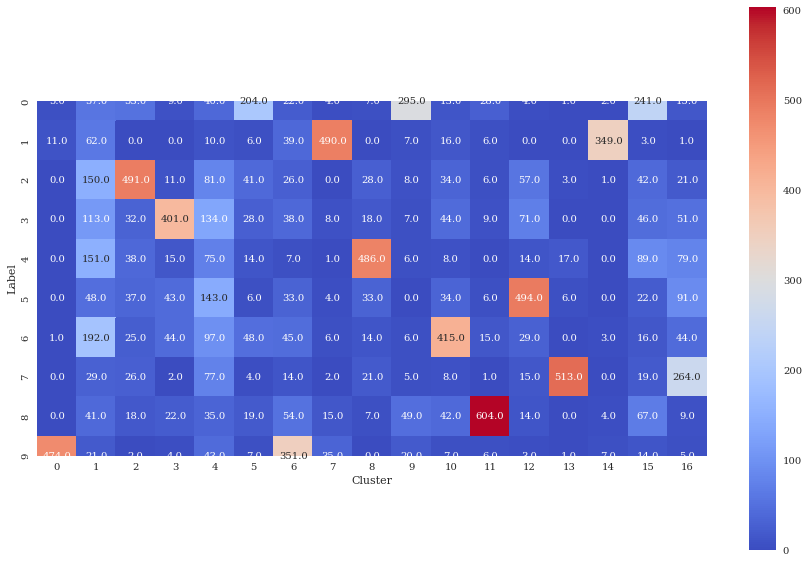

In [416]:
check_clustering_resnet18(17)

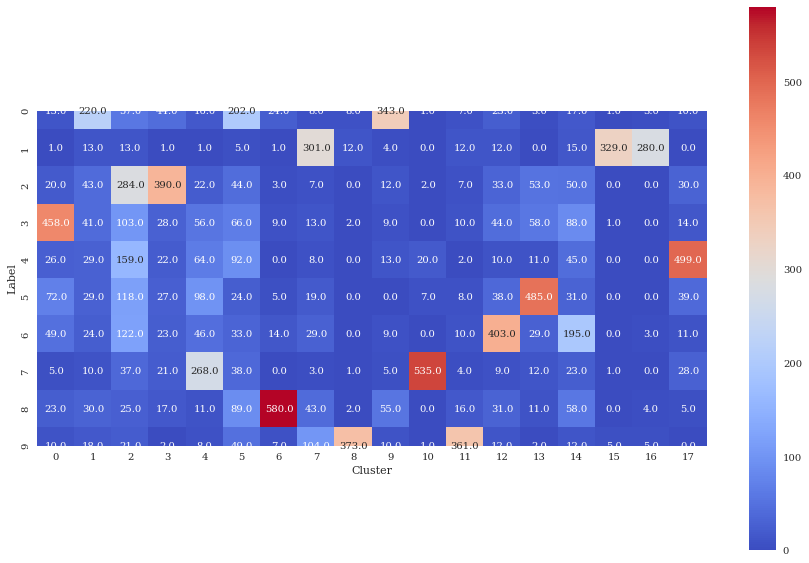

In [417]:
check_clustering_resnet18(18)

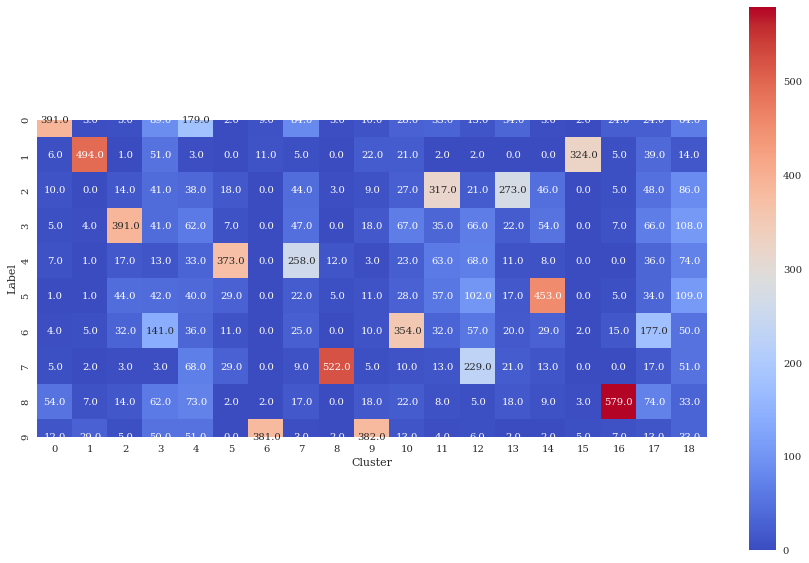

In [418]:
check_clustering_resnet18(19)

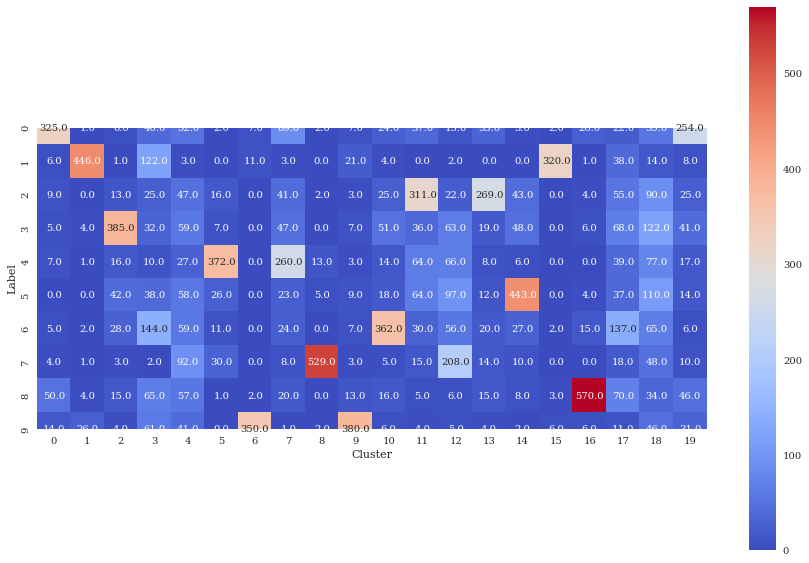

In [419]:
check_clustering_resnet18(20)

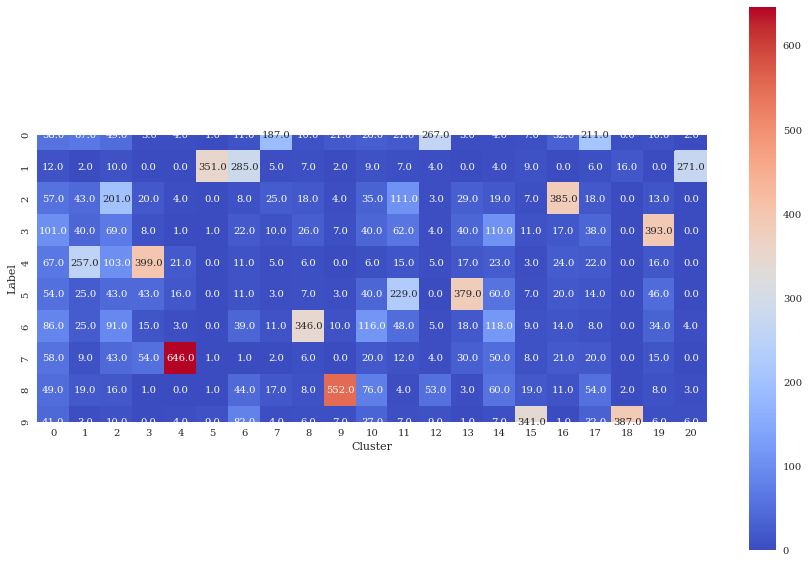

In [422]:
check_clustering_resnet18(21)

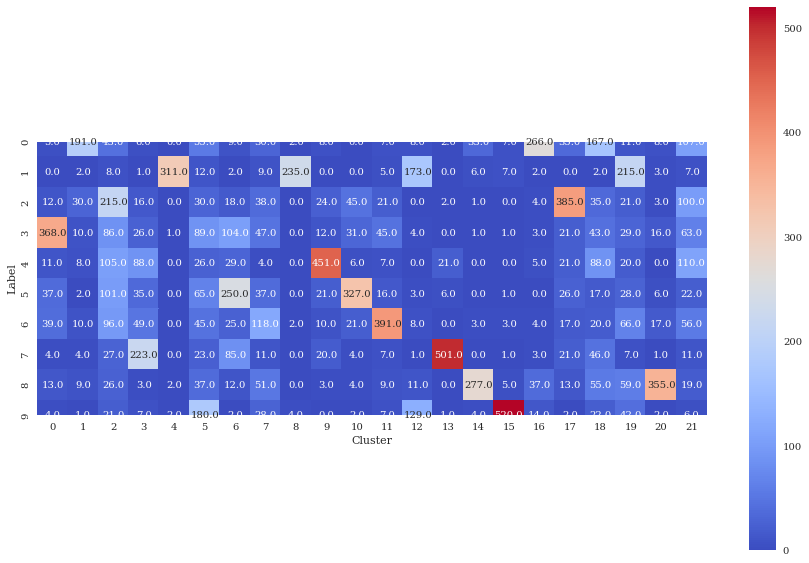

In [421]:
check_clustering_resnet18(22)

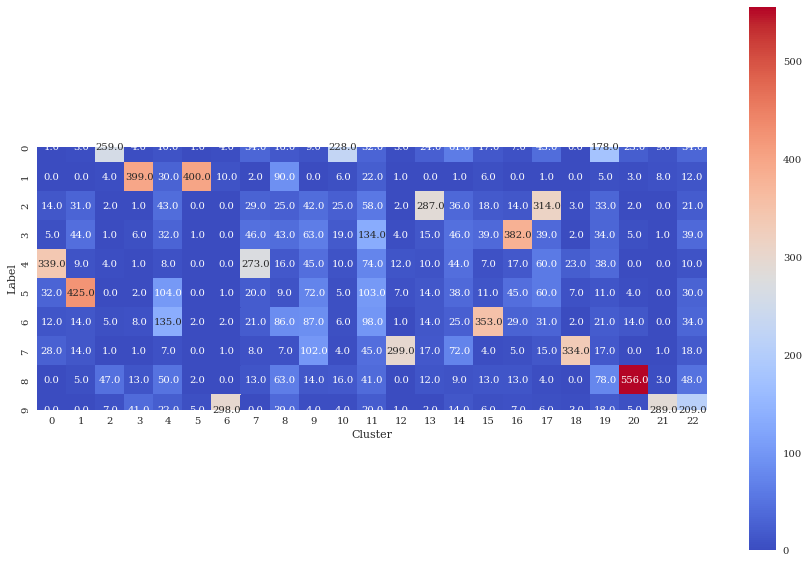

In [420]:
check_clustering_resnet18(23)

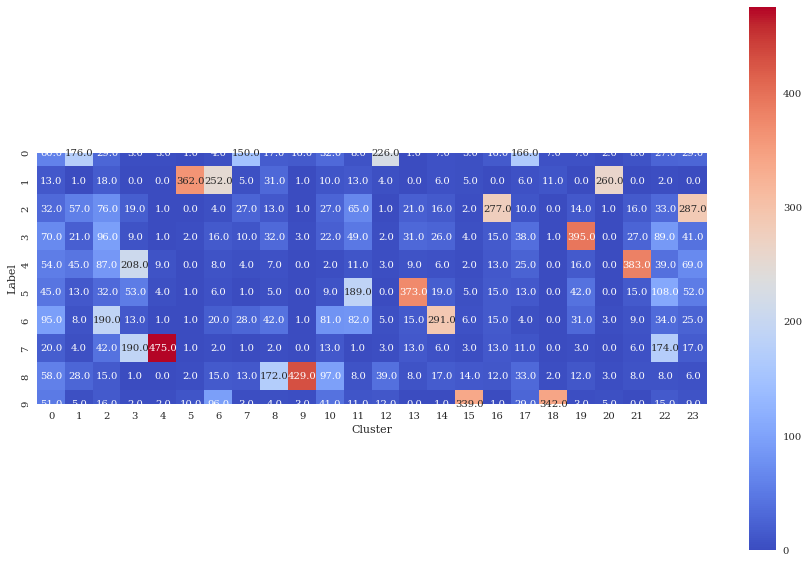

In [423]:
check_clustering_resnet18(24)

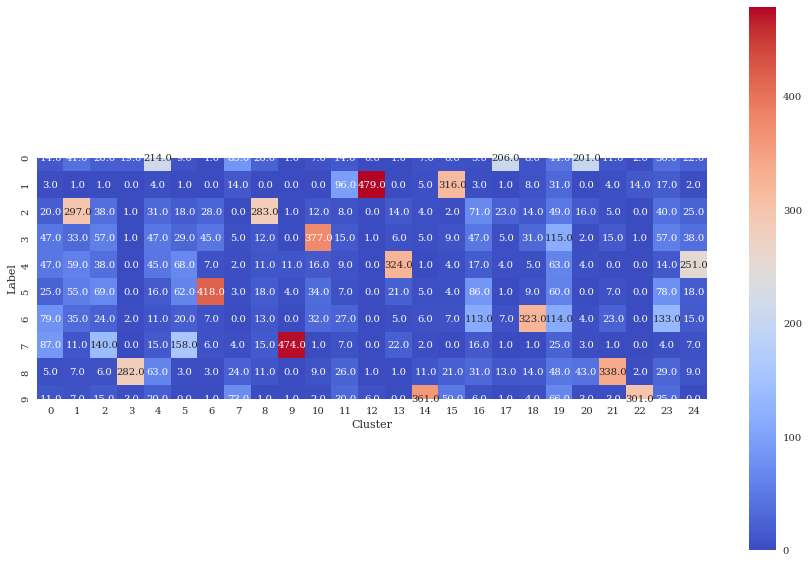

In [424]:
check_clustering_resnet18(25)

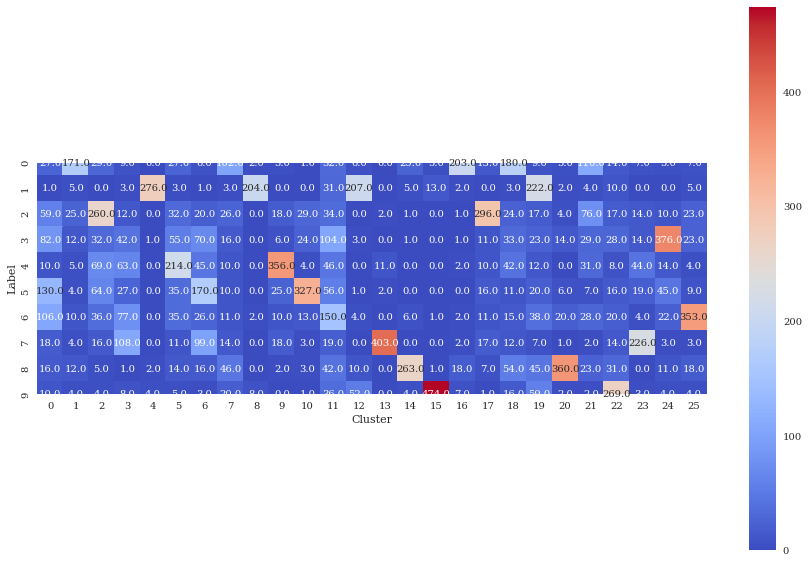

In [425]:
check_clustering_resnet18(26)

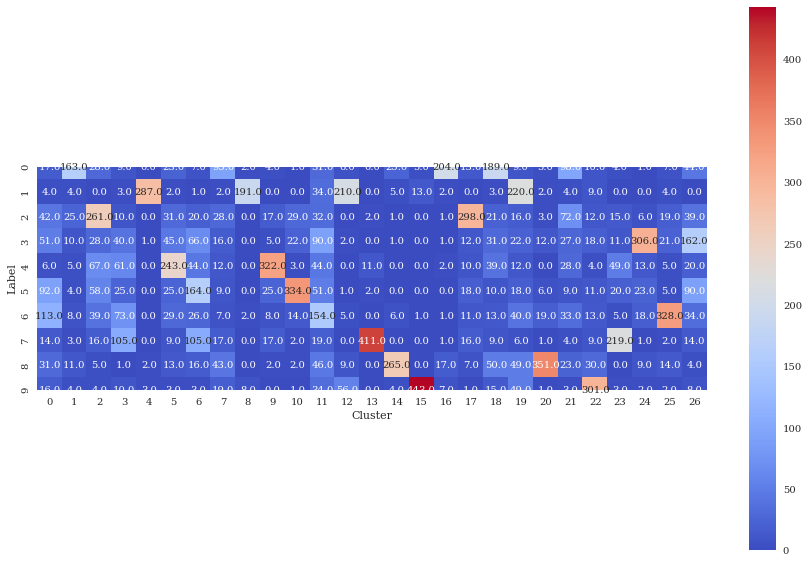

In [426]:
check_clustering_resnet18(27)

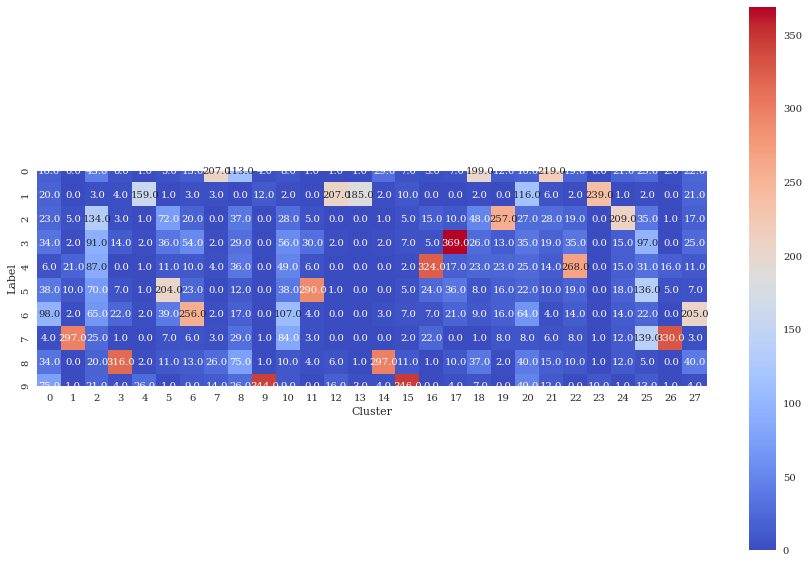

In [427]:
check_clustering_resnet18(28)

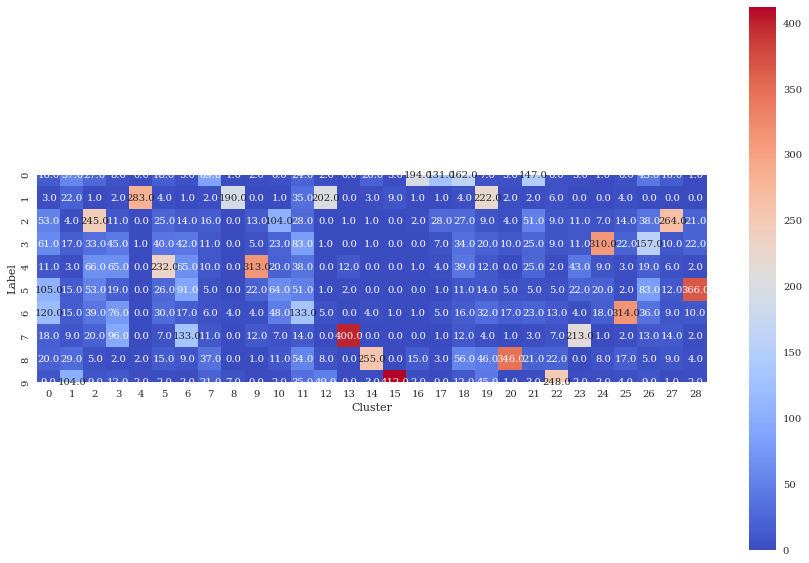

In [428]:
check_clustering_resnet18(29
                         )

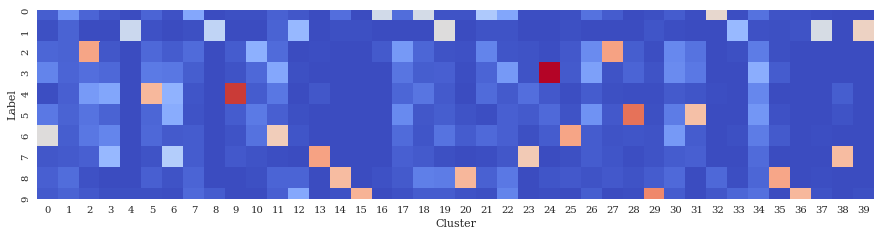

In [432]:
check_clustering_resnet18(40
                         )

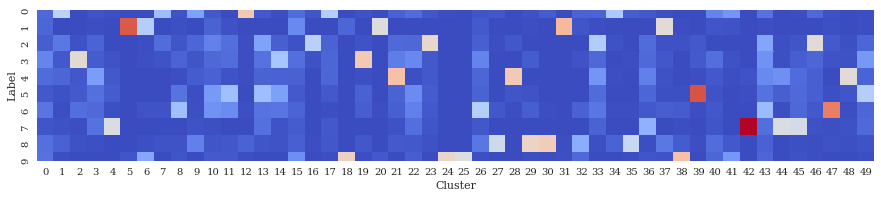

In [433]:
check_clustering_resnet18(50
                         )

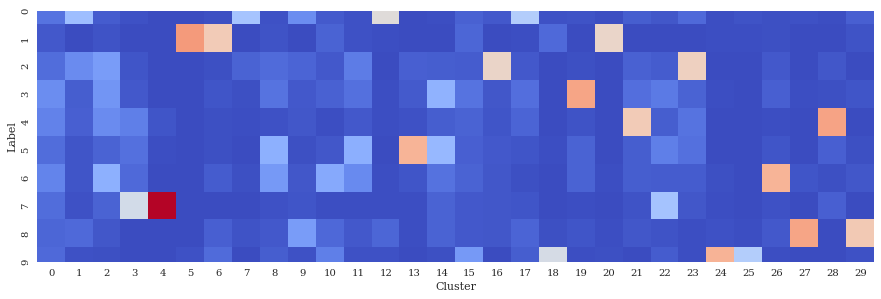

In [434]:
check_clustering_resnet18(30
                         )

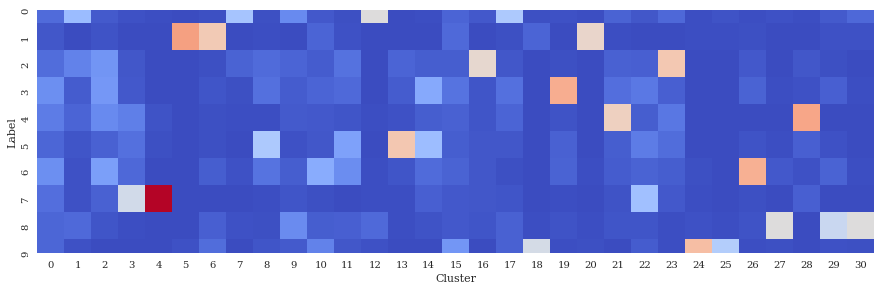

In [435]:
check_clustering_resnet18(31
                         )

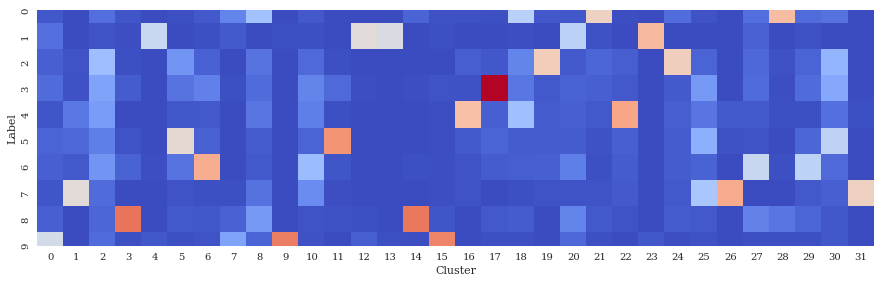

In [436]:
check_clustering_resnet18(32
                         )

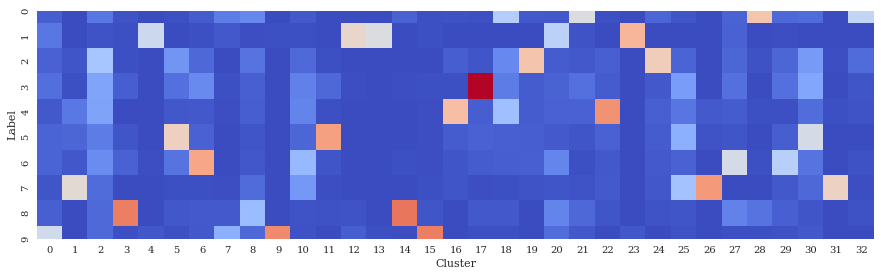

In [437]:
check_clustering_resnet18(33                         )

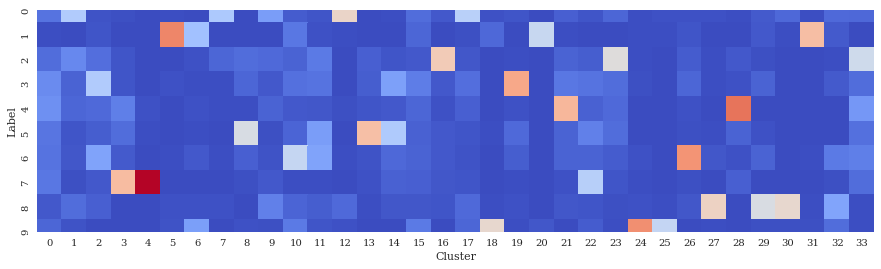

In [438]:
check_clustering_resnet18(34
                         )

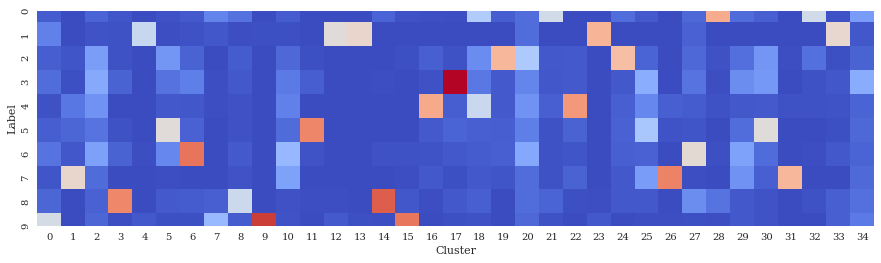

In [439]:
check_clustering_resnet18(35
                         )

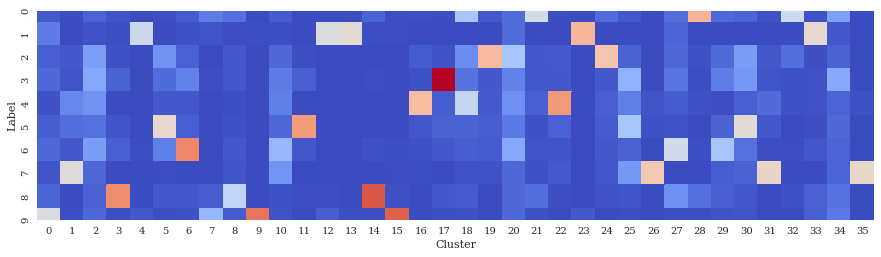

In [440]:
check_clustering_resnet18(36
                         )

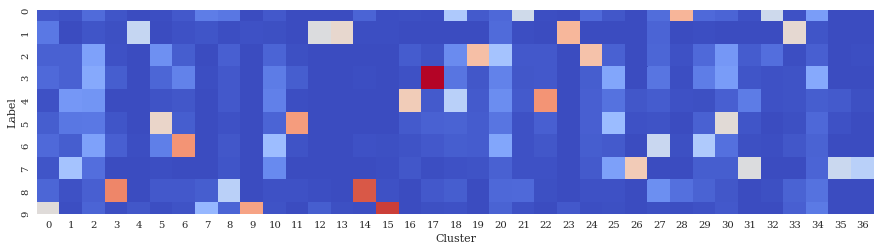

In [441]:
check_clustering_resnet18(37
                         )

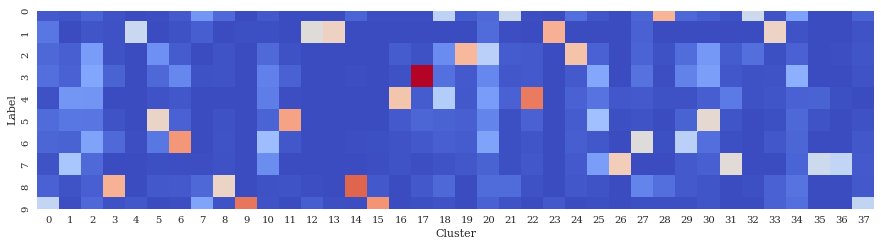

In [442]:
check_clustering_resnet18(38
                         )

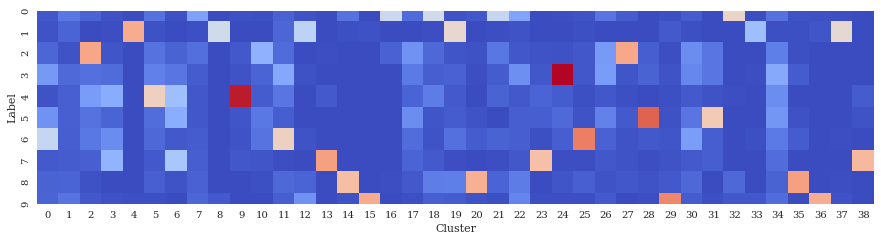

In [443]:
check_clustering_resnet18(39
                         )